In [36]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import dash
from dash import dcc
from dash import html
os.chdir('/Users/Lenovo/Desktop/EBAC')
warnings.filterwarnings('ignore')

In [62]:
# Carga de los datos
df = pd.read_csv('SYB67_230_202411_GDP and GDP Per Capita.csv')
# Convertir la primera fila en encabezado
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1995,GDP in current prices (millions of US dollars),"31,290,901",NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",2005,GDP in current prices (millions of US dollars),"47,816,593",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2010,GDP in current prices (millions of US dollars),"66,633,612",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2015,GDP in current prices (millions of US dollars),"75,440,153",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2020,GDP in current prices (millions of US dollars),"85,483,570",NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
6769,716,Zimbabwe,2010,GDP real rates of growth (percent),19.7,NaN,"United Nations Statistics Division, New York, ..."
6770,716,Zimbabwe,2015,GDP real rates of growth (percent),1.8,NaN,"United Nations Statistics Division, New York, ..."
6771,716,Zimbabwe,2020,GDP real rates of growth (percent),-5.3,NaN,"United Nations Statistics Division, New York, ..."
6772,716,Zimbabwe,2021,GDP real rates of growth (percent),6.3,NaN,"United Nations Statistics Division, New York, ..."


In [64]:
# Datos de Mexico
df_Mexico = df[df["Region/Country/Area"] == '484']
df_Mexico

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
4251,484,Mexico,1995,GDP in current prices (millions of US dollars),"380,157",NaN,"United Nations Statistics Division, New York, ..."
4252,484,Mexico,2005,GDP in current prices (millions of US dollars),"917,572",NaN,"United Nations Statistics Division, New York, ..."
4253,484,Mexico,2010,GDP in current prices (millions of US dollars),"1,105,424",NaN,"United Nations Statistics Division, New York, ..."
4254,484,Mexico,2015,GDP in current prices (millions of US dollars),"1,213,294",NaN,"United Nations Statistics Division, New York, ..."
4255,484,Mexico,2020,GDP in current prices (millions of US dollars),"1,120,832",NaN,"United Nations Statistics Division, New York, ..."
4256,484,Mexico,2021,GDP in current prices (millions of US dollars),"1,313,070",NaN,"United Nations Statistics Division, New York, ..."
4257,484,Mexico,2022,GDP in current prices (millions of US dollars),"1,463,324",NaN,"United Nations Statistics Division, New York, ..."
4258,484,Mexico,1995,GDP per capita (US dollars),"4,225",NaN,"United Nations Statistics Division, New York, ..."
4259,484,Mexico,2005,GDP per capita (US dollars),"8,702",NaN,"United Nations Statistics Division, New York, ..."
4260,484,Mexico,2010,GDP per capita (US dollars),"9,823",NaN,"United Nations Statistics Division, New York, ..."


In [32]:
# Revisamos los tipos de datos
df_Mexico.dtypes

0
Region/Country/Area    object
NaN                    object
Year                   object
Series                 object
Value                   int32
Footnotes              object
Source                 object
dtype: object

In [66]:
# Cambiamos la columna Value a Int
df_Mexico["Value"] = pd.to_numeric(df_Mexico["Value"].str.replace(",", ""), errors="coerce")
df_Mexico = df_Mexico.dropna(subset=["Value"])
df_Mexico["Value"] = df_Mexico["Value"].astype(int)
df_Mexico

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
4251,484,Mexico,1995,GDP in current prices (millions of US dollars),380157,NaN,"United Nations Statistics Division, New York, ..."
4252,484,Mexico,2005,GDP in current prices (millions of US dollars),917572,NaN,"United Nations Statistics Division, New York, ..."
4253,484,Mexico,2010,GDP in current prices (millions of US dollars),1105424,NaN,"United Nations Statistics Division, New York, ..."
4254,484,Mexico,2015,GDP in current prices (millions of US dollars),1213294,NaN,"United Nations Statistics Division, New York, ..."
4255,484,Mexico,2020,GDP in current prices (millions of US dollars),1120832,NaN,"United Nations Statistics Division, New York, ..."
4256,484,Mexico,2021,GDP in current prices (millions of US dollars),1313070,NaN,"United Nations Statistics Division, New York, ..."
4257,484,Mexico,2022,GDP in current prices (millions of US dollars),1463324,NaN,"United Nations Statistics Division, New York, ..."
4258,484,Mexico,1995,GDP per capita (US dollars),4225,NaN,"United Nations Statistics Division, New York, ..."
4259,484,Mexico,2005,GDP per capita (US dollars),8702,NaN,"United Nations Statistics Division, New York, ..."
4260,484,Mexico,2010,GDP per capita (US dollars),9823,NaN,"United Nations Statistics Division, New York, ..."


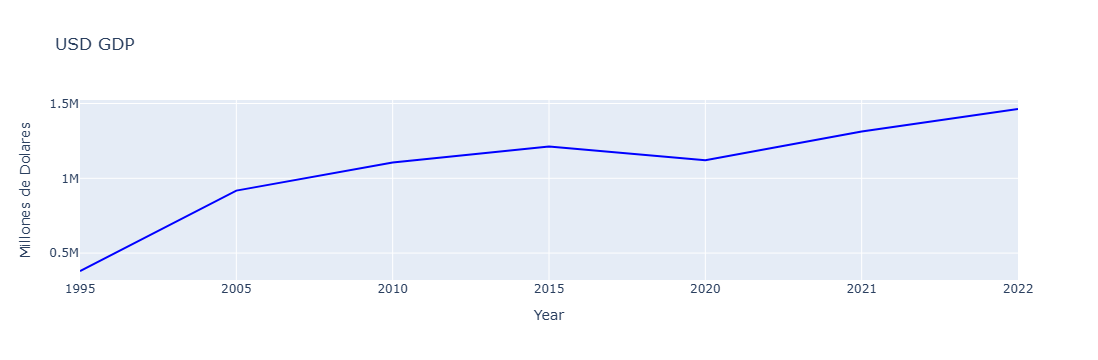

In [72]:
# Crecimiento en $
df_MXUSD = df_Mexico[df_Mexico["Series"] == 'GDP in current prices (millions of US dollars)']
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x = df_MXUSD["Year"], y = df_MXUSD["Value"], mode = "lines", name = "Growth", line = dict(color = "blue")))
fig1.update_layout(title = "USD GDP", xaxis_title = "Year",
                   yaxis_title = "Millones de Dolares")
fig1.show()

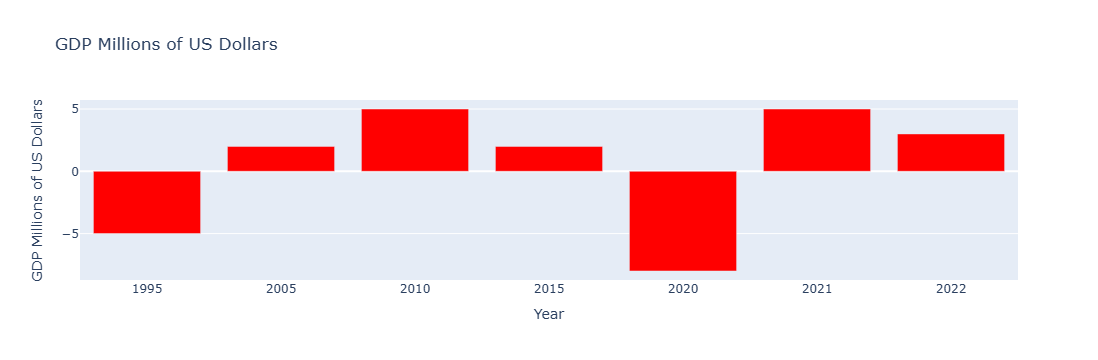

In [70]:
# Crecimiento de GDP en dlls a traves de los años
df_MXP = df_Mexico[df_Mexico["Series"] == 'GDP real rates of growth (percent)']
fig2 = go.Figure()
fig2.add_trace(go.Bar(x = df_MXP["Year"], y = df_MXP["Value"], name = "GDP", marker = dict(color = "red")))
fig2.update_layout(title = "GDP Millions of US Dollars",
                   xaxis_title = "Year",
                   yaxis_title = "GDP Millions of US Dollars")
fig2.show()

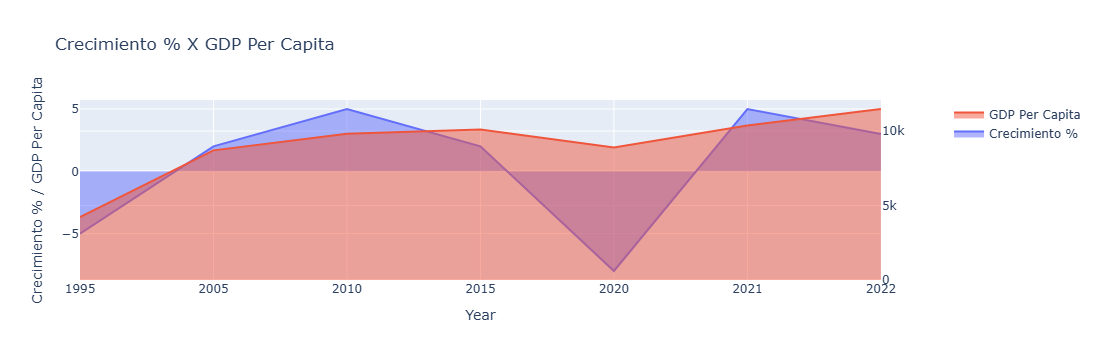

In [76]:
# Crecimiento X GDP per Capita
df_MXGP = df_Mexico[df_Mexico["Series"] == 'GDP real rates of growth (percent)']
df_MXPC = df_Mexico[df_Mexico["Series"] == 'GDP per capita (US dollars)']
fig4 = make_subplots(specs = [[{"secondary_y" : True}]])
fig4.add_trace(go.Scatter(x = df_MXGP["Year"], y = df_MXGP["Value"], mode = 'lines', name = "Crecimiento %", stackgroup = 'one'), secondary_y = False)
fig4.add_trace(go.Scatter(x = df_MXPC["Year"], y = df_MXPC["Value"], mode = 'lines', name = "GDP Per Capita", stackgroup = 'one'), secondary_y = True)
fig4.update_layout(title = "Crecimiento % X GDP Per Capita",
                   xaxis_title = "Year",
                   yaxis_title = "Crecimiento % / GDP Per Capita")
fig4.show()

# Dashboard

In [83]:
# Consolidacion de graficos

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Cuadro de Control de Mando (Dashboard)'),

    html.Div([
        dcc.Graph(figure = fig1),
        dcc.Graph(figure = fig2),
    ], style = {'display': 'flex'}),

    html.Div([
        dcc.Graph(figure = fig4),
    ], style = {'display': 'flex'}),
])

if __name__ == '__main__':
    app.run(debug=True, port=8051)

# Conclusion:
En los ultimos años Mexico ha tenido un desaceleramiento con respecto al crecimiento del producto interno bruto, podemos observar como desde 1995, los siguientes 3 lustros tuvieron bastante buen desempeño, mermado por la contraccion del 2020.
Tambien, cabe descatar que el PIB per capita tuvo muy buen desempeño de 1995 a 2015, en donde pasamos de $USD4225 (1995)  a $USD10098 (2015), para en 2020 al igual a la contraccion pasar a $USD 8896.